# Example of grouped regressions

In this section, we want to demanstrate a slightly advanced example for using Pandas grouped transformation for performing many ordinary least square model fits in parallel. We reuse the weather data and try to predict the temperature of all stations with a very simple model per station.

In [34]:
%matplotlib inline

## 1 Load Data
First we load data of a single year.

In [30]:
storageLocation = "s3://dimajix-training/data/weather"

In [32]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

rawWeatherData = spark.read.text(storageLocation + "/2003")
weather_all = rawWeatherData.select(
    substring(col("value"),5,6).alias("usaf"),
    substring(col("value"),11,5).alias("wban"),
    to_timestamp(substring(col("value"),16,12),"yyyyMMddHHmm").alias("timestamp"),
    to_timestamp(substring(col("value"),16,12),"yyyyMMddHHmm").cast("long").alias("ts"),
    substring(col("value"),42,5).alias("report_type"),
    substring(col("value"),61,3).alias("wind_direction"),
    substring(col("value"),64,1).alias("wind_direction_qual"),
    substring(col("value"),65,1).alias("wind_observation"),
    (substring(col("value"),66,4).cast("float") / lit(10.0)).alias("wind_speed"),
    substring(col("value"),70,1).alias("wind_speed_qual"),
    (substring(col("value"),88,5).cast("float") / lit(10.0)).alias("air_temperature"),
    substring(col("value"),93,1).alias("air_temperature_qual")
)

# 2 Analysis of one station

First we only analyse a single station, just to check our approach and the expressiveness of our model. It won't be a very good fit, but it will be good enough for our needs to demonstrate the concept.

So first we pick a single station, and we also only keep those records with a valid temeprature measurement.

In [56]:
weather_single = weather_all.where("usaf='954920' and wban='99999'").cache()

In [37]:
pdf = weather_single.where(weather_single.air_temperature_qual == 1).toPandas()
pdf.limit(10)

usaf   wban           timestamp          ts report_type  \
0     954920  99999 2003-01-01 00:00:00  1041379200       FM-12   
1     954920  99999 2003-01-01 02:00:00  1041386400       FM-12   
2     954920  99999 2003-01-01 03:00:00  1041390000       FM-12   
3     954920  99999 2003-01-01 05:00:00  1041397200       FM-12   
4     954920  99999 2003-01-01 06:00:00  1041400800       FM-12   
5     954920  99999 2003-01-01 08:00:00  1041408000       FM-12   
6     954920  99999 2003-01-01 09:00:00  1041411600       FM-12   
7     954920  99999 2003-01-01 11:00:00  1041418800       FM-12   
8     954920  99999 2003-01-01 12:00:00  1041422400       FM-12   
9     954920  99999 2003-01-01 14:00:00  1041429600       FM-12   
10    954920  99999 2003-01-01 15:00:00  1041433200       FM-12   
11    954920  99999 2003-01-01 17:00:00  1041440400       FM-12   
12    954920  99999 2003-01-01 18:00:00  1041444000       FM-12   
13    954920  99999 2003-01-01 20:00:00  1041451200       FM-12   
14    954920  99999 2003-01-01 21:00:00  1041454800       FM-12   
15    954920  99999 2003-01-01 23:00:00  1041462000       FM-12   
16    954920  99999 2003-01-02 00:00:00  1041465600       FM-12   
17    954920  99999 2003-01-02 02:00:00  1041472800       FM-12   
18    954920  99999 2003-01-02 03:00:00  1041476400       FM-12   
19    954920  99999 2003-01-02 05:00:00  1041483600       FM-12   
20    954920  99999 2003-01-02 06:00:00  1041487200       FM-12   
21    954920  99999 2003-01-02 08:00:00  1041494400       FM-12   
22    954920  99999 2003-01-02 09:00:00  1041498000       FM-12   
23    954920  99999 2003-01-02 11:00:00  1041505200       FM-12   
24    954920  99999 2003-01-02 12:00:00  1041508800       FM-12   
25    954920  99999 2003-01-02 14:00:00  1041516000       FM-12   
26    954920  99999 2003-01-02 15:00:00  1041519600       FM-12   
27    954920  99999 2003-01-02 17:00:00  1041526800       FM-12   
28    954920  99999 2003-01-02 18:00:00  1041530400       FM-12   
29    954920  99999 2003-01-02 20:00:00  1041537600       FM-12   
...      ...    ...                 ...         ...         ...   
5493  954920  99999 2003-12-30 03:00:00  1072753200       FM-12   
5494  954920  99999 2003-12-30 05:00:00  1072760400       FM-12   
5495  954920  99999 2003-12-30 06:00:00  1072764000       FM-12   
5496  954920  99999 2003-12-30 08:00:00  1072771200       FM-12   
5497  954920  99999 2003-12-30 09:00:00  1072774800       FM-12   
5498  954920  99999 2003-12-30 11:00:00  1072782000       FM-12   
5499  954920  99999 2003-12-30 12:00:00  1072785600       FM-12   
5500  954920  99999 2003-12-30 14:00:00  1072792800       FM-12   
5501  954920  99999 2003-12-30 15:00:00  1072796400       FM-12   
5502  954920  99999 2003-12-30 17:00:00  1072803600       FM-12   
5503  954920  99999 2003-12-30 18:00:00  1072807200       FM-12   
5504  954920  99999 2003-12-30 20:00:00  1072814400       FM-12   
5505  954920  99999 2003-12-30 21:00:00  1072818000       FM-12   
5506  954920  99999 2003-12-30 23:00:00  1072825200       FM-12   
5507  954920  99999 2003-12-31 00:00:00  1072828800       FM-12   
5508  954920  99999 2003-12-31 02:00:00  1072836000       FM-12   
5509  954920  99999 2003-12-31 03:00:00  1072839600       FM-12   
5510  954920  99999 2003-12-31 05:00:00  1072846800       FM-12   
5511  954920  99999 2003-12-31 06:00:00  1072850400       FM-12   
5512  954920  99999 2003-12-31 08:00:00  1072857600       FM-12   
5513  954920  99999 2003-12-31 09:00:00  1072861200       FM-12   
5514  954920  99999 2003-12-31 11:00:00  1072868400       FM-12   
5515  954920  99999 2003-12-31 12:00:00  1072872000       FM-12   
5516  954920  99999 2003-12-31 14:00:00  1072879200       FM-12   
5517  954920  99999 2003-12-31 15:00:00  1072882800       FM-12   
5518  954920  99999 2003-12-31 17:00:00  1072890000       FM-12   
5519  954920  99999 2003-12-31 18:00:00  1072893600       FM-12   
5520  954920  99999 2003-12-31 20:00:00  1072900800    

## 2.1 Create Feature Space

Our model will simply predict the temperature depending on the time and day of year. We use sin and cos of with a day-wide period and a year-wide period as features for fitting the model.

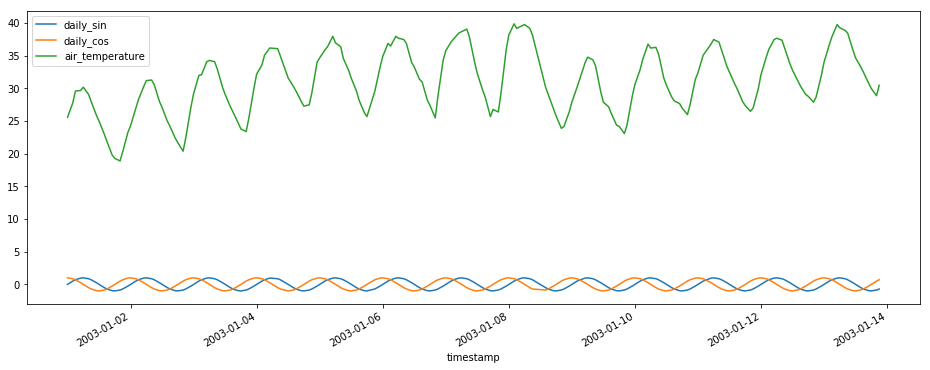

In [57]:
import numpy as np
import math

seconds_per_day = 24*60*60
seconds_per_year = 365*seconds_per_day

# Add sin and cos as features for fitting
pdf['daily_sin'] = np.sin(pdf['ts']/seconds_per_day*2.0*math.pi)
pdf['daily_cos'] = np.cos(pdf['ts']/seconds_per_day*2.0*math.pi)
pdf['yearly_sin'] = np.sin(pdf['ts']/seconds_per_year*2.0*math.pi)
pdf['yearly_cos'] = np.cos(pdf['ts']/seconds_per_year*2.0*math.pi)

# Make a plot, just to check how it looks like
pdf[0:200].plot(x='timestamp', y=['daily_sin','daily_cos','air_temperature'], figsize=[16,6])

## 2.2 Fit model

Now that we have the temperature and some features, we fit a simple model.

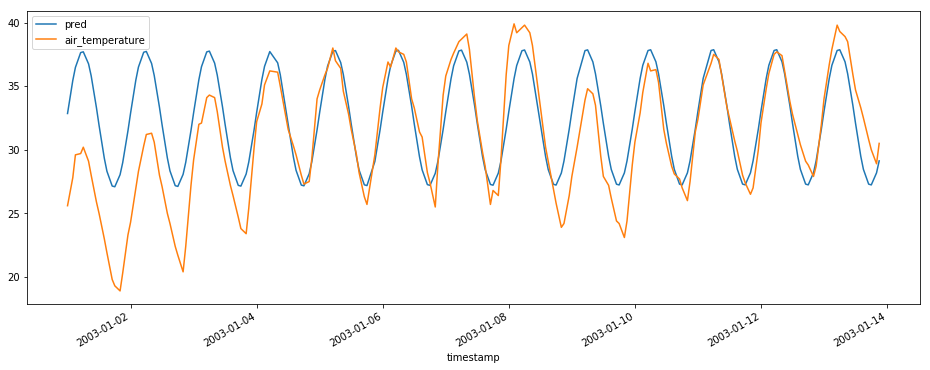

In [70]:
import statsmodels.api as sm

# define target variable y
y = pdf['air_temperature']
# define feature variables X
X = pdf[['ts', 'daily_sin', 'daily_cos', 'yearly_sin', 'yearly_cos']]
X = sm.add_constant(X)
# fit model
model = sm.OLS(y, X).fit()

# perform prediction
pdf['pred'] = model.predict(X)

# Make a plot of real temperature vs predicted temperature
pdf[0:200].plot(x='timestamp', y=['pred','air_temperature'], figsize=[16,6])

## 2.3 Inspect Model

Now let us inspect the model, in order to find a way to store it in a Pandas DataFrame

In [71]:
model.params

const         1.836431e+01
ts            4.503481e-09
daily_sin     5.313380e+00
daily_cos     4.699659e-01
yearly_sin    3.045510e+00
yearly_cos    8.993267e+00
dtype: float64

In [72]:
type(model.params)

pandas.core.series.Series

Finally let us create a Pandas DataFrame from the model parameters. This code snippet will be needed later when we want to parallelize the fitting for different weather stations using Spark.

In [73]:
x_columns = X.columns
pd.DataFrame([[model.params[i] for i in  x_columns]], columns=x_columns)

const            ts  daily_sin  daily_cos  yearly_sin  yearly_cos
0  18.364309  4.503481e-09    5.31338   0.469966     3.04551    8.993267

# 3 Perform OLS for all stations

Now we want to create a model for all stations. First we filter the data again, such that we only have valid temperature measurements.

In [75]:
valid_weather = weather_all.filter(weather_all.air_temperature_qual == 1)

## 3.1 Feature extraction

Now we generate the same features, but this time we use Spark instead of Pandas operations. This simplifies later model fitting.

In [89]:
import math

seconds_per_day = 24*60*60
seconds_per_year = 365*seconds_per_day

features = valid_weather.select(
    valid_weather.usaf,
    valid_weather.wban,
    valid_weather.air_temperature,
    valid_weather.ts,
    lit(1.0).alias('const'),
    sin(valid_weather.ts * 2.0 * math.pi / seconds_per_day).alias('daily_sin'),
    cos(valid_weather.ts * 2.0 * math.pi / seconds_per_day).alias('daily_cos'),
    sin(valid_weather.ts * 2.0 * math.pi / seconds_per_year).alias('yearly_sin'),
    cos(valid_weather.ts * 2.0 * math.pi / seconds_per_year).alias('yearly_cos')
)

features.limit(10).toPandas()

usaf   wban  air_temperature          ts  const  daily_sin  daily_cos  \
0  703160  25624             -2.0  1041380220    1.0   0.074108   0.997250   
1  703160  25624              2.0  1041400380    1.0   0.999534   0.030539   
2  703160  25624             -3.0  1041421980    1.0   0.030539  -0.999534   
3  703160  25624             -4.0  1041443580    1.0  -0.999534  -0.030539   
4  703160  25624             -3.0  1041465180    1.0  -0.030539   0.999534   
5  703160  25624             -2.0  1041486780    1.0   0.999534   0.030539   
6  703160  25624             -2.0  1041489960    1.0   0.979925  -0.199368   
7  703160  25624             -2.0  1041490920    1.0   0.963630  -0.267238   
8  703160  25624             -2.0  1041499380    1.0   0.632705  -0.774393   
9  703160  25624             -2.0  1041501960    1.0   0.477159  -0.878817   

   yearly_sin  yearly_cos  
0    0.137480    0.990505  
1    0.141457    0.989944  
2    0.145716    0.989326  
3    0.149973    0.988690  
4    0.154226    0.988036  
5    0.158477    0.987363  
6    0.159102    0.987262  
7    0.159291    0.987232  
8    0.160955    0.986962  
9    0.161462    0.986879

## 3.2 Fit Models

Now we use a Spark Pandas grouped UDF in order to fit models for all weather stations in parallel. This is done by defining a Pandas Gruped Map UDF, which receives all values of a single weather station as its input and returns a Pandas data frame containing one row with all model parameters. This UDF is then used in a grouped map aggregation using `groupby(...).apply(...)`.

In [90]:
group_columns = ['usaf', 'wban']
y_column = 'air_temperature'
x_columns = ['ts', 'const', 'daily_sin', 'daily_cos', 'yearly_sin', 'yearly_cos']
schema = features.select(*group_columns, *x_columns).schema

@pandas_udf(schema, PandasUDFType.GROUPED_MAP)
def ols(pdf):
    # Extract grouping information from appropriate columns
    group = [pdf[g].iloc[0] for g in group_columns]
    # Extract target variable
    y = pdf[y_column]
    # Extract predictor variables
    X = pdf[x_columns]
    # Create model using Python statsmodel package to fit y to input variables x
    model = sm.OLS(y, X).fit()
    # Create a Pandas data frame with one row containing the grouping columns and all model parameters
    return pd.DataFrame([group + [model.params[i] for i in x_columns]], columns=group_columns + x_columns)

# Now fit model for all weather stations in parallel using Spark
models = features.groupby(weather_all.usaf, weather_all.wban).apply(ols).cache()

In [91]:
models.limit(10).toPandas()

usaf   wban  ts       const  daily_sin  daily_cos  yearly_sin  yearly_cos
0  954920  99999   0   18.364309   5.313380   0.469966    3.045510    8.993267
1  038940  99999   0   25.272246  -0.826144  -1.376067   -3.693573   -4.713150
2  999999  94074   0   -5.866619  -4.867254   4.548186   -2.788635  -13.403601
3  111200  99999   0  -73.725936  -2.577125  -3.810438   -3.091114  -11.116201
4  727923  94225   0  178.539020  -0.597472   1.318946   -5.304252   -2.788685
5  701330  26616   0  207.711918   0.154068   0.326450   -9.337710  -11.273081
6  724273  03804   0 -138.120951  -1.752578   1.236404   -4.714701  -10.270727
7  726410  14837   0  -88.717287  -1.930264   2.198496   -6.594899  -11.926900
8  725560  14941   0   21.283986  -2.378156   3.185683   -5.713081  -13.298528
9  028450  99999   0 -188.638633  -0.772881  -1.636365   -3.677941  -12.949335

## 3.3 Inspect and compare results

Now let's pick the same station again, and compare the model to the original model.

In [92]:
models.where("usaf='954920' and wban='99999'").toPandas()

usaf   wban  ts      const  daily_sin  daily_cos  yearly_sin  yearly_cos
0  954920  99999   0  18.364309    5.31338   0.469966     3.04551    8.993267

In [85]:
model.params

const         1.836431e+01
ts            4.503481e-09
daily_sin     5.313380e+00
daily_cos     4.699659e-01
yearly_sin    3.045510e+00
yearly_cos    8.993267e+00
dtype: float64